In [127]:
import torch
import torchvision
from torch import nn
from torchsummary import summary   #used for finding summary
from torch.utils.data import DataLoader  
import torchvision.datasets as datasets
from torchvision import transforms
from torchvision.utils import save_image

import time
from progressbar import *
import os
import matplotlib.pyplot as plt 
import numpy as np

In [128]:
#Enable cuda if cuda is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device, "is available ")

cuda is available 


In [129]:
#image for transformation 
num_epochs = 100
batch_size = 128
learning_rate = 1e-3

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

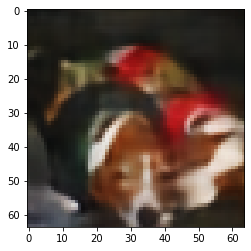

In [130]:
image = plt.imread("./dogs/2.png")
plt.imshow(image)
image_tensor = torch.from_numpy(image).reshape([1,64,64,3])

In [131]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, 3, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.decoder = nn.Sequential(
                nn.ConvTranspose2d(64, 128, 4,stride=1, padding = 2),
                nn.ReLU(),
                nn.ConvTranspose2d(128, 64, 4, stride = 2, padding = 1),
                nn.ReLU(),
                nn.ConvTranspose2d(64,3,4, stride=2, padding=1)
        )

    def forward(self, x):
        print(x.size())
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,
                             weight_decay=1e-5)

print("Input shape :", image_tensor2.size()[1:] )
summary(model, (3,64,64))   #used for finding summary 

Input shape : torch.Size([64, 64, 3])
torch.Size([2, 3, 64, 64])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 66, 66]             896
              ReLU-2           [-1, 32, 66, 66]               0
         MaxPool2d-3           [-1, 32, 33, 33]               0
            Conv2d-4           [-1, 64, 35, 35]          18,496
              ReLU-5           [-1, 64, 35, 35]               0
         MaxPool2d-6           [-1, 64, 17, 17]               0
   ConvTranspose2d-7          [-1, 128, 16, 16]         131,200
              ReLU-8          [-1, 128, 16, 16]               0
   ConvTranspose2d-9           [-1, 64, 32, 32]         131,136
             ReLU-10           [-1, 64, 32, 32]               0
  ConvTranspose2d-11            [-1, 3, 64, 64]           3,075
Total params: 284,803
Trainable params: 284,803
Non-trainable params: 0
------------------------------

In [132]:
image_tensor2 = torch.from_numpy(image).reshape([1,64,64,3])
image_tensor.size()[1:]

torch.Size([64, 64, 3])

In [133]:
h = image_tensor.reshape(1,3,64,64)
model.forward(h.cuda()).shape

torch.Size([1, 3, 64, 64])


torch.Size([1, 3, 64, 64])

In [134]:
img_transform(image)

tensor([[[-0.8275, -0.8588, -0.8588,  ..., -0.8353, -0.8510, -0.8275],
         [-0.8196, -0.8431, -0.8353,  ..., -0.8196, -0.8353, -0.8431],
         [-0.7961, -0.7804, -0.7961,  ..., -0.8275, -0.8275, -0.8275],
         ...,
         [-0.6863, -0.6471, -0.6549,  ..., -0.6549, -0.6471, -0.6706],
         [-0.6314, -0.5922, -0.6078,  ..., -0.6627, -0.6784, -0.7020],
         [-0.4275, -0.3725, -0.3804,  ..., -0.6863, -0.7020, -0.6941]],

        [[-0.8275, -0.8510, -0.8510,  ..., -0.8510, -0.8510, -0.8431],
         [-0.8196, -0.8353, -0.8353,  ..., -0.8510, -0.8510, -0.8510],
         [-0.7804, -0.7804, -0.7961,  ..., -0.8431, -0.8353, -0.8353],
         ...,
         [-0.6784, -0.6549, -0.6471,  ..., -0.7020, -0.7255, -0.7255],
         [-0.6157, -0.5765, -0.5922,  ..., -0.7176, -0.7255, -0.7569],
         [-0.4118, -0.3725, -0.3804,  ..., -0.7412, -0.7490, -0.7333]],

        [[-0.8431, -0.8667, -0.8588,  ..., -0.8745, -0.8745, -0.8745],
         [-0.8353, -0.8431, -0.8431,  ..., -0

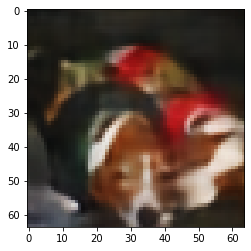

In [135]:
g = image_tensor.reshape(1,3,64,64)
h = image_tensor.numpy().reshape(64,64,3)
plt.imshow(h)

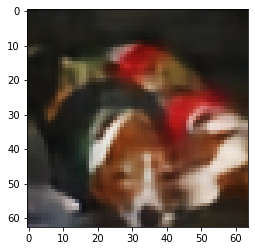

In [136]:
h = image_tensor.numpy().reshape(64,64,3)
plt.imshow(h[1:])

In [138]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

def transform_image(data):
    return img_transform(data).reshape(1,3,64,64).to(device)

torch.Size([1, 3, 64, 64])


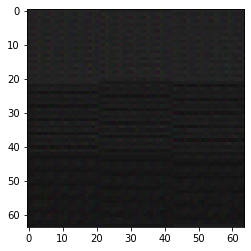

In [156]:
transformed_image = transform_image(image)
output = model.forward(transformed_image)
output = output.cpu().detach().numpy().reshape(64,64,3)
plt.imshow(output)

In [158]:
output.shape

(64, 64, 3)